Machine Learning Basics with the K-Nearest Neighbors Algorithm 
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

K-Nearest Neighbors

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.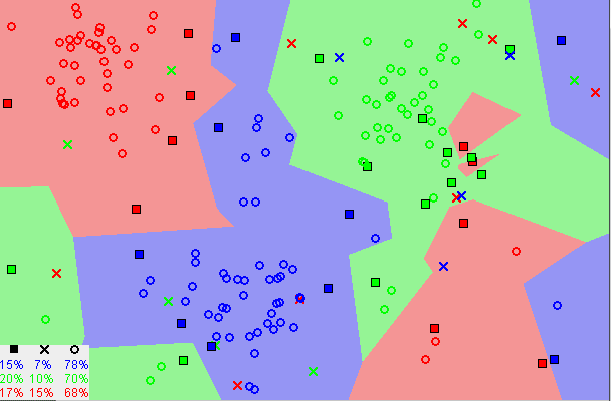
Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.
The KNN Algorithm

    Load the data
    Initialize K to your chosen number of neighbors

3. For each example in the data

3.1 Calculate the distance between the query example and the current example from the data.

3.2 Add the distance and the index of the example to an ordered collection

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels
The KNN implementation (from scratch)

In [1]:
from collections import Counter
import math


In [15]:
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []  # defining empty list 
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        print('index', index)
        
        # 3.1 Calculate the distance between the query example and the current example from the data
        distance = distance_fn(example[:-1], query)  # It is list indexing, it returns all elements of example [:] except the last one
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index)) # list.append(elem) -- adds a single element to the end of the list. Common error: does not return the new list, just modifies the original.
        
    # 4. Sort the ordered collection of distances and indices from smalles to largest (ascending order) by the distances
    
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    print('sort distance', sorted_neighbor_distances_and_indices)
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    print('k distance', k_nearest_distances_and_indices)
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices] # will give 1st label value from different ith entries of the nested list
    print('k_nearest_labels', k_nearest_labels)
    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    print(k_nearest_distances_and_indices, choice_fn(k_nearest_labels))
    return k_nearest_distances_and_indices, choice_fn(k_nearest_labels)
    

In [21]:
def mean(labels):
    return sum(labels)/ len(labels)

def mode(labels):
    print(Counter(labels).most_common(1)[0][0])
    return Counter(labels).most_common(1)[0][0]
 

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
        
    return math.sqrt(sum_squared_distance)

'''
# Regression Data
    
# Column 0: height (inches)
# Column 1: weight (pounds)
'''
# data = data[value,labels]  
reg_data = [[65.75, 112.99],[71.52, 136.49],[69.40, 153.03],[68.22, 142.34],[67.79, 144.30],[68.70, 123.30],[69.80, 141.49],[70.01, 136.46],
[67.90, 112.37],[66.49, 127.45],]
    
# Question:
# Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall ?
   
reg_query = [60]
reg_k_nearest_neighbors, reg_prediction = knn(reg_data, reg_query, k = 3, distance_fn = euclidean_distance, choice_fn = mean)
#print(reg_k_nearest_neighbors, reg_prediction) 
'''
    
# Classification Data
Column 0: age
Column 1: likes pineapple
'''
    
clf_data = [[22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],]
    
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = [33]
clf_k_nearest_neighbors, clf_prediction = knn(clf_data, clf_query, k = 3, distance_fn=euclidean_distance, choice_fn=mode)
    

index 0
index 1
index 2
index 3
index 4
index 5
index 6
index 7
index 8
index 9
sort distance [(5.75, 0), (6.489999999999995, 9), (7.790000000000006, 4), (7.900000000000006, 8), (8.219999999999999, 3), (8.700000000000003, 5), (9.400000000000006, 2), (9.799999999999997, 6), (10.010000000000005, 7), (11.519999999999996, 1)]
k distance [(5.75, 0), (6.489999999999995, 9), (7.790000000000006, 4)]
k_nearest_labels [112.99, 127.45, 144.3]
[(5.75, 0), (6.489999999999995, 9), (7.790000000000006, 4)] 128.24666666666667
index 0
index 1
index 2
index 3
index 4
index 5
index 6
index 7
index 8
index 9
sort distance [(2.0, 8), (4.0, 7), (6.0, 6), (8.0, 5), (10.0, 1), (11.0, 0), (12.0, 2), (12.0, 9), (14.0, 4), (15.0, 3)]
k distance [(2.0, 8), (4.0, 7), (6.0, 6)]
k_nearest_labels [0, 0, 0]
0
[(2.0, 8), (4.0, 7), (6.0, 6)] 0
0
